# Gradient Descent

In [318]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
import tensorflow as tf
from sklearn.linear_model import SGDRegressor


def loss(w):
    return np.sin(w)

def gradient_descent(w_0 = 2, learning_rate = 0.01, epsilon=0.001):
    w = w_0
    w_values = [w]
    converging = True
    while converging:
        w_new = w - learning_rate * nd.Gradient(loss)([w])

        if (np.abs(w_new - w) < epsilon):
            converging = False

        w = w_new
        w_values.append(w)

    return w_values

def plot_descent(w, loss, descent_weights=None, learning_rate=None, main_title='Gradient Descent'):
    plt.style.use('default')
    plt.plot(w, loss(w), color='black', lw=1)
    if descent_weights:
        colors = np.linspace(0, 1, len(descent_weights))
        plt.scatter(descent_weights, loss(descent_weights), 
                    c=colors, cmap='brg', marker='o', zorder=99)
        plt.title(r'{} ($\eta = {}$, ${}$ iterations)'.format(main_title, learning_rate, len(descent_weights)))
    plt.xlabel('Weights')
    plt.ylabel('Loss')
    plt.show()

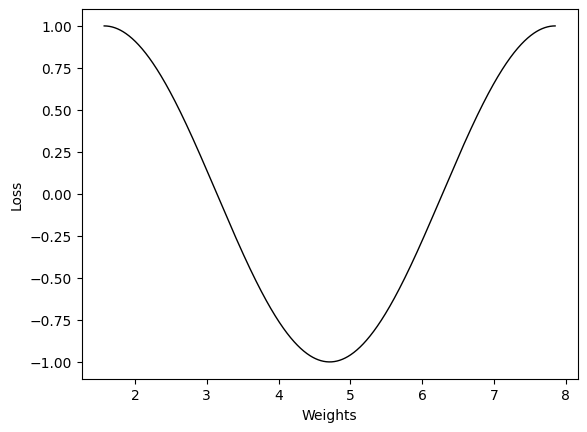

In [319]:
w = np.linspace(np.pi/2, 5*np.pi/2, 1000)
plot_descent(w, loss)

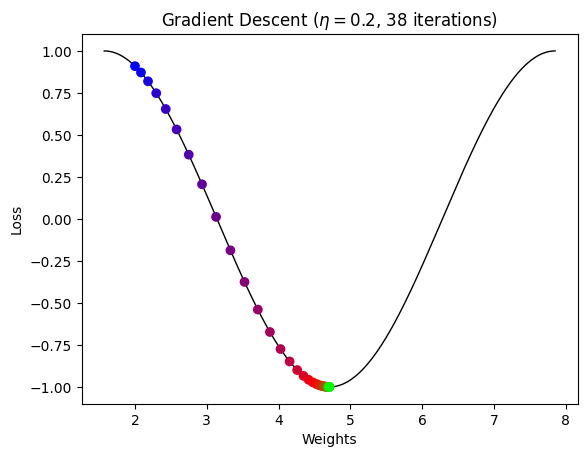

In [320]:
learning_rate = 0.2
descent_weights = gradient_descent(learning_rate=learning_rate)
plot_descent(w, loss, descent_weights, learning_rate=learning_rate)

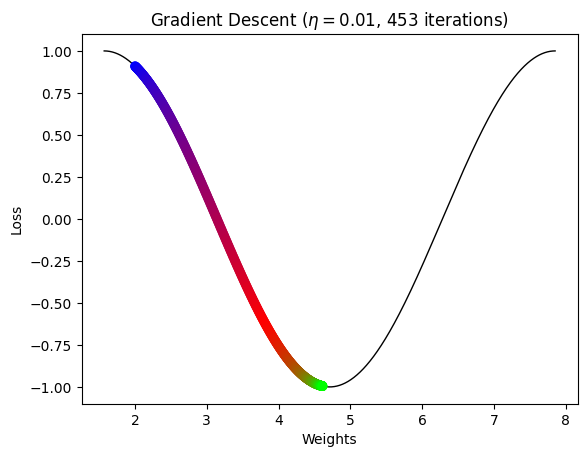

In [321]:
learning_rate = 0.01
descent_weights = gradient_descent(learning_rate=learning_rate)
plot_descent(w, loss, descent_weights, learning_rate=learning_rate)

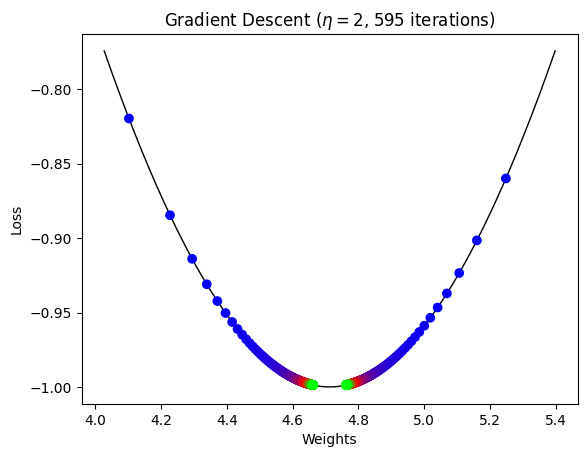

In [322]:
learning_rate = 2
descent_weights = gradient_descent(w_0=2.5, learning_rate=learning_rate, epsilon=0.1)
w_zoom = np.linspace((5/4)*np.pi + 0.1, (7/4)*np.pi - 0.1, 1000)
plot_descent(w_zoom, loss, descent_weights[1:], learning_rate=learning_rate)

In [323]:
def gradient_descent_dynamic(w_0 = 2, learning_rate_0 = 1, epsilon=0.001):
    w = w_0
    w_values = [w]
    converging = True
    t = 1
    while converging:
        learning_rate = learning_rate_0 / np.sqrt(t)
        w_new = w - learning_rate * nd.Gradient(loss)([w])

        if (np.abs(w_new - w) < epsilon):
            converging = False

        w = w_new
        w_values.append(w)
        t = t + 1

    return w_values

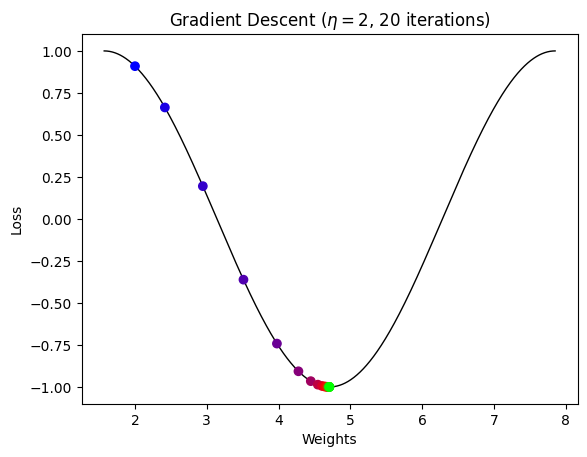

In [324]:
learning_rate_0 = 1
descent_weights = gradient_descent_dynamic(learning_rate_0=learning_rate_0)
plot_descent(w, loss, descent_weights, learning_rate=learning_rate)

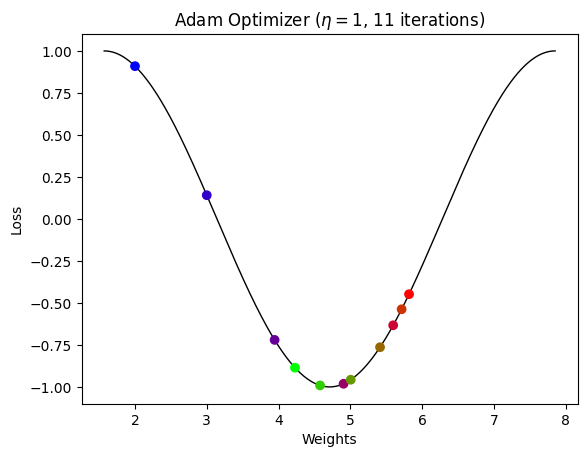

In [325]:
def loss_tf(w):
    return tf.sin(w)

w_0 = 2
w_var = tf.Variable(initial_value=w_0, dtype=tf.float64)

learning_rate = 1
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
num_iterations = 10
descent_weights = [w_0]
for _ in range(num_iterations):
    with tf.GradientTape() as tape:
        current_loss = loss_tf(w_var)
    
    gradients = tape.gradient(current_loss, w_var)
    optimizer.apply_gradients([(gradients, w_var)])

    descent_weights.append(w_var.numpy())

descent_weights = list(descent_weights)
plot_descent(w, loss_tf, descent_weights, learning_rate=learning_rate, main_title='Adam Optimizer')